In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas_datareader import data as web

ImportError: cannot import name PandasError

In [4]:
from pylab import plt

In [5]:
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
data = web.DataReader('AAPL', data_source='google')

In [8]:
#SMA CLASS

In [13]:
class SMABacktester(object):
    def __init__(self,symbol, SMA1,SMA2, start, end):
        self.symbol = symbol
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.start = start
        self.end = end
        self.get_data()
    
    def get_data(self):
        self.data = pd.DataFrame(web.DataReader(self.symbol, data_source="google", 
                                 start= self.start,end = self.end)["Close"])
        self.data.rename(columns={"Close":"price"}, inplace = True)
        self.data["SMA1"] = self.data["price"].rolling(self.SMA1).mean()
        self.data["SMA2"] = self.data["price"].rolling(self.SMA2).mean()
        self.data["returns"] =np.log(self.data["price"]/self.data["price"].shift(1))
        self.data.dropna(inplace=True)
        
    def plot_data(self):
        self.data[["price", "SMA1", "SMA2"]].plot(figsize=(10,6))
    
    def run_strategy(self):
        self.data["position"] = np.where(self.data["SMA1"] > self.data["SMA2"], 1, -1)
        self.data["strategy"] = self.data["position"].shift(1) * self.data["returns"]
        ax = self.data[["returns", "strategy"]].cumsum().apply(np.exp).plot(figsize = (10,6))
        self.data["position"].plot(ax=ax, title= '%s | SMA1=%d | SMA2=%d'
                                  % (self.symbol, self.SMA1, self.SMA2))

In [14]:
sma = SMABacktester("AAPL", 42, 252, "2010-1-1", "2016-12-31")

In [15]:
sma.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2011-01-03 to 2016-12-30
Data columns (total 4 columns):
price      1510 non-null float64
SMA1       1510 non-null float64
SMA2       1510 non-null float64
returns    1510 non-null float64
dtypes: float64(4)
memory usage: 59.0 KB


In [77]:
sma.data.tail()

,price,SMA1,SMA2,returns
Date,,,,
2016-12-23,116.52,112.025000,104.451508,0.001976
2016-12-27,117.26,112.064762,104.492937,0.006331
2016-12-28,116.76,112.119048,104.524762,-0.004273
2016-12-29,116.73,112.190714,104.562103,-0.000257
2016-12-30,115.82,112.245000,104.604008,-0.007826


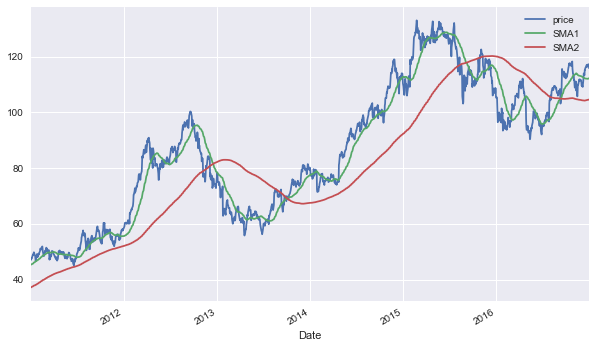

In [78]:
sma.plot_data()

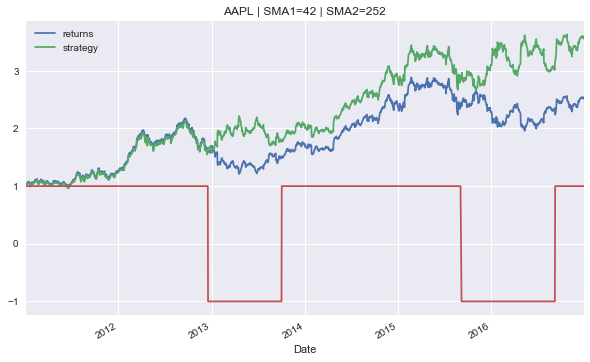

In [79]:
sma.run_strategy()

In [80]:
symbols = ["AAPL", "MSFT", "YHOO"]

In [81]:
sma1 = [20, 35, 50]

In [82]:
sma2 = [240, 260, 280]

In [83]:
list(zip(sma1, sma2))

[(20, 240), (35, 260), (50, 280)]

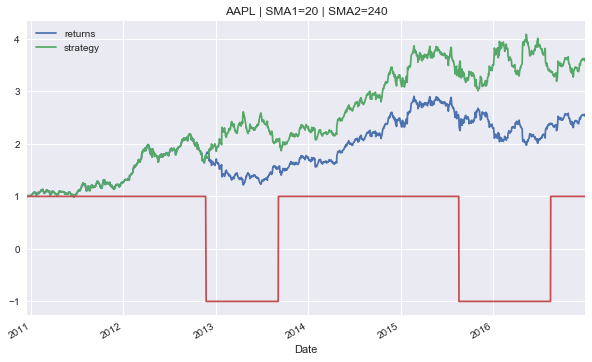

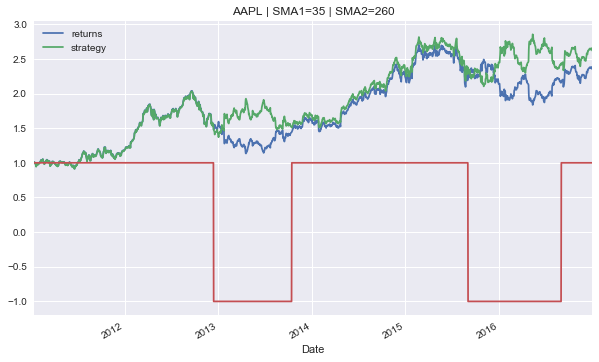

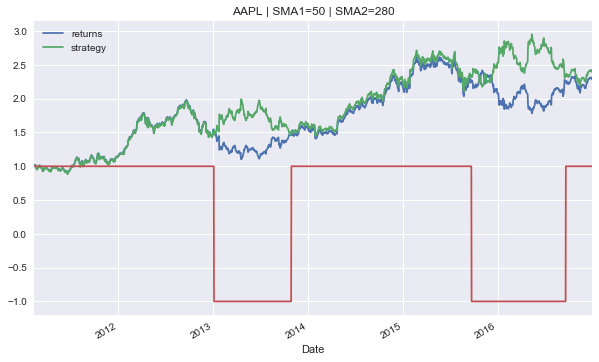

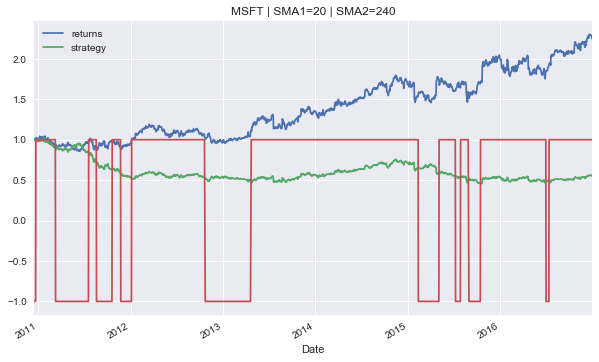

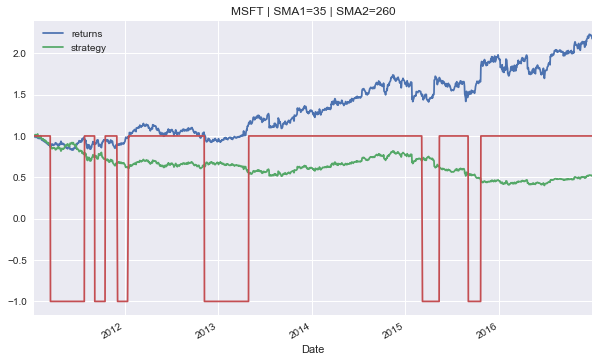

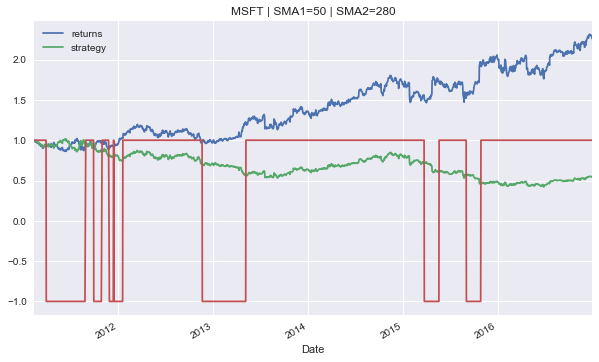

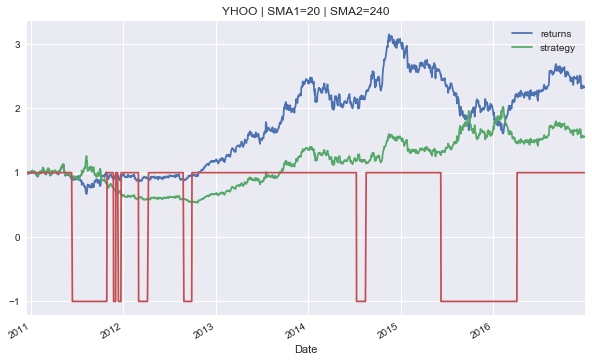

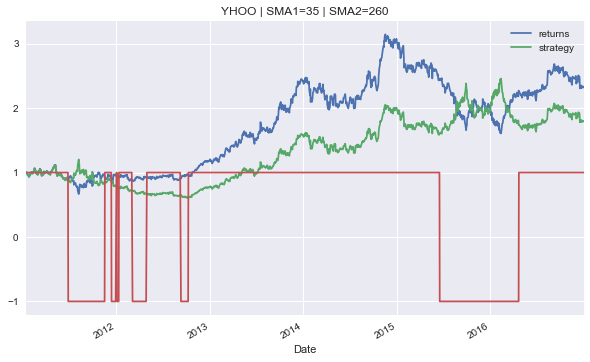

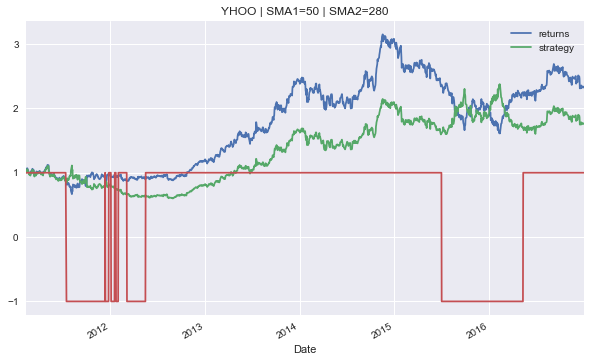

In [84]:
for sym in symbols:
    for s in zip(sma1, sma2):
        sma = SMABacktester(sym, s[0], s[1], "2010-1-1", "2016-12-31")
        sma.run_strategy()

In [85]:
## Optimization


In [ ]:
from scipy.optimize import brute

In [103]:
class SMAOptimizer(SMABacktester):
    
    def get_data(self):
        self.data = pd.DataFrame(web.DataReader(self.symbol, data_source="google", 
                                 start= self.start,end = self.end)["Close"])
        self.data.rename(columns={"Close":"price"}, inplace = True)
        self.data["returns"] =np.log(self.data["price"]/self.data["price"].shift(1))

    def run_strategy(self, SMA):
        self.SMA1 = SMA[0]
        self.SMA2 = SMA[1]
        data = self.data.copy()
        data["SMA1"] = self.data["price"].rolling(self.SMA1).mean()
        data["SMA2"] = self.data["price"].rolling(self.SMA2).mean()
        data["position"] = np.where(data["SMA1"] > data["SMA2"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace = True)
        return -np.exp(data["strategy"].sum())
    
    def optimize_strategy(self, SMA1_range, SMA2_range):
        opt = brute(self.run_strategy, (SMA1_range, SMA2_range), finish=None)
        return opt

In [104]:
smao = SMAOptimizer("AAPL", 42, 252, "2010-1-1", "2016-12-31")

In [105]:
smao.run_strategy((42,230))

-3.312277041176412

In [109]:
SMA1_range = (20,60,5)
SMA2_range = (220,280,5)

In [111]:
smao.optimize_strategy(SMA1_range, SMA2_range)

NameError: global name 'brute' is not defined